In [2]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from numpy.random import randint
import numpy as np
print("Imports Successful")


Imports Successful


┌───┐ ░ ┌───┐┌─┐
q_0: ┤ H ├─░─┤ H ├┤M├
     └───┘ ░ └───┘└╥┘
c: 1/══════════════╩═
                   0

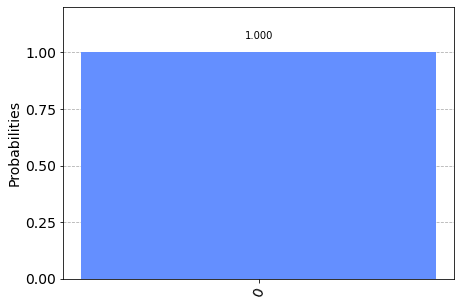

In [4]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.barrier()

qc.h(0)
qc.measure(0, 0)

display(qc.draw())
svs = Aer.get_backend('qasm_simulator')
job = execute(qc, svs)
plot_histogram(job.result().get_counts())


┌───┐┌─┐ ░ ┌───┐┌─┐
q_0: ┤ H ├┤M├─░─┤ H ├┤M├
     └───┘└╥┘ ░ └───┘└╥┘
c: 1/══════╩══════════╩═
           0          0

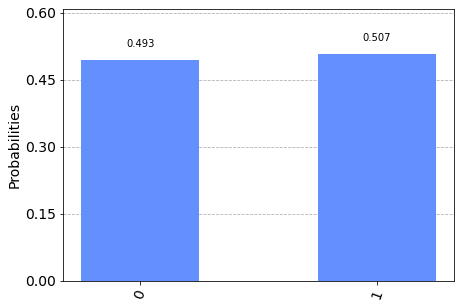

In [5]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.measure(0,0)
qc.barrier()
qc.h(0)
qc.measure(0,0)
display(qc.draw())
svs = Aer.get_backend('qasm_simulator')
job = execute(qc, svs)
plot_histogram(job.result().get_counts())


In [6]:
np.random.seed(seed = 0)

In [7]:
n = 100

In [8]:
np.random.seed(seed = 0)
n = 100
alice_bits = randint(2, size = n)
print(alice_bits)

[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0
 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0]


In [9]:
np.random.seed(seed = 0)
n = 100
alice_bits = randint(2, size = n)
alice_bases = randint(2, size = n)
print(alice_bases)

[1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0
 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0]


In [11]:
def encode_message(bits, bases):
    message = []
    for i in range(n):
        qc = QuantumCircuit(1,1)
        if bases[i] == 0:
            if bits[i] == 0:
                pass
            else:
                qc.x(0)
        else:
            if bits[i] == 0:
                qc.h(0)
            else:
                qc.x(0)
                qc.h(0)
        qc.barrier()
        message.append(qc)
    return message


In [12]:
np.random.seed(seed = 0)
n = 100
alice_bits = randint(2, size = n)
alice_bases = randint(2, size = n)
message = encode_message(alice_bits, alice_bases)

In [13]:
print('bit = %i' % alice_bits[0])
print('basis = %i' % alice_bases[0])


bit = 0
basis = 1


In [14]:
message[0].draw()

┌───┐ ░ 
q_0: ┤ H ├─░─
     └───┘ ░ 
c: 1/════════

bit = 1
basis = 0


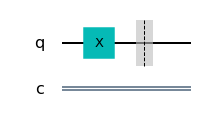

In [15]:
print('bit = %i' % alice_bits[4])
print('basis = %i' % alice_bases[4])
message[4].draw('mpl')

In [17]:
np.random.seed(seed = 0)
n = 100

alice_bits = randint(2, size = n)
alice_bases = randint(2, size = n)
messgae = encode_message(alice_bits, alice_bases)
bob_bases = randint(2, size = n)
print(bob_bases)

[1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0
 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1]


In [21]:
def measure_message(messgae, bases):
    backend = Aer.get_backend('qasm_simulator')
    measurements = []
    for q in range(n):
        if bases[q] == 0:
            message[q].measure(0,0)
        if bases[q] == 1:
            message[q].h(0)
            message[q].measure(0,0)
        result = execute(message[q], backend, shots = 1, memory = True).result()
        measured_bit = int(result.get_memory()[0])
        measurements.append(measured_bit)
    return measurements

In [22]:
np.random.seed(seed = 0)
n = 100
alice_bits = randint(2, size = n)
alice_bases = randint(2, size = n)
message = encode_message(alice_bits, alice_bases)

bob_bases = randint(2, size = n)
bob_results = measure_message(message, bob_bases)

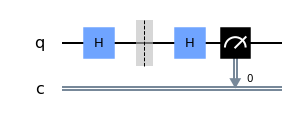

In [23]:
message[0].draw('mpl')

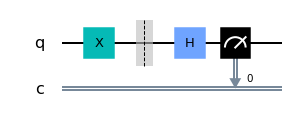

In [24]:
message[6].draw('mpl')

In [25]:
print(bob_results)

[0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1]


In [27]:
def remove_garbage(a_bases, b_bases, bits):
    good_bits = []
    for q in range(n):
        if a_bases[q] == b_bases[q]:
            good_bits.append(bits[q])
    return good_bits

In [30]:
np.random.seed(seed = 0)
n = 100
alice_bits = randint(2, size = n)
alice_bases = randint(2, size = n)
bob_bases = randint(2, size = n)
bob_results = measure_message(message, bob_bases)
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
print(alice_key)

[0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0]


In [32]:
np.random.seed(seed = 0)
n = 100
alice_bits = randint(2, size = n)
alice_bases = randint(2, size = n)
message = encode_message(alice_bits, alice_bases)
bob_bases = randint(2, size = n)
bob_results = measure_message(message, bob_bases)
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
print(bob_key)

[0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0]


In [33]:
def sample_bits(bits, selection):
    sample = []
    for i in selection:
        i = np.mod(i, len(bits))
        sample.append(bits.pop(i))
    return sample


In [34]:
np.random.seed(seed = 0)
n = 100
alice_bits = randint(2, size = n)
alice_bases = randint(2, size = n)
message = encode_message(alice_bits, alice_bases)
bob_bases = randint(2, size = n)
bob_resutls = measure_message(message, bob_bases)
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
sample_size = 15
bit_selection = randint(n , size = sample_size)
bob_sample = sample_bits(bob_key, bit_selection)
print("  bob_sample = " + str(bob_sample))
alice_sample = sample_bits(alice_key, bit_selection)
print("alice_sample = " + str(alice_sample))

  bob_sample = [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
alice_sample = [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]


In [35]:
print(bob_key)
print(alice_key)
print("key length =%i" % len(alice_key))

[1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0]
[1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0]
key length =33


In [36]:
np.random.seed(seed = 3)

In [37]:
np.random.seed(seed = 3)
alice_bits = randint(2, size = n)
print(alice_bits)

[0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1
 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1]


In [38]:
np.random.seed(seed = 3)
alice_bits = randint(2, size = n)
alice_bases = randint(2, size = n)
message = encode_message(alice_bits, alice_bases)
print(alice_bases)

[1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0
 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1
 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1]


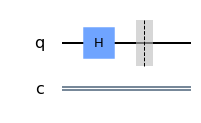

In [39]:
message[0].draw('mpl')

In [40]:
np.random.seed(seed = 3)
alice_bits = randint(2, size = n)
alice_bases = randint(2, size = n)
mesasge = encode_message(alice_bits, alice_bases)
eve_bases = randint(2, size = n)
intercepted_message = measure_message(message, eve_bases)
print(intercepted_message)

[1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1]


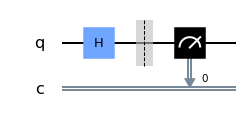

In [41]:
message[0].draw('mpl')

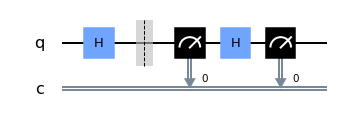

In [42]:
np.random.seed(seed = 3)
alice_bits = randint(2, size = n)
alice_bases = randint(2, size = n)
message = encode_message(alice_bits, alice_bases)
eve_bases = randint(2, size = n)
intercepted_message = measure_message(message, eve_bases)
bob_bases = randint(2, size = n)
bob_results = measure_message(message, bob_bases)
message[0].draw('mpl')

In [43]:
np.random.seed(seed = 3)
alice_bits = randint(2, size = n)
alice_bases = randint(2, size = n)
message = encode_message(alice_bits, alice_bases)
eve_bases = randint(2, size = n)
intercepted_message = measure_message(message, eve_bases)
bob_bases = randint(2, size = n)
bob_results = measure_message(message, bob_bases)
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)


In [48]:
np.random.seed(seed = 3)
alice_bits = randint(2, size = n)
alice_bases = randint(2, size = n)
message = encode_message(alice_bits, alice_bases)
eve_bases = randint(2, size = n)
intercepted_messgae = measure_message(message, eve_bases)
bob_bases = randint(2, size = n)
bob_results = measure_message(message, bob_bases)
bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
sample_size = 15
bit_selection = randint(n, size = sample_size)
bob_sample = sample_bits(bob_key, bit_selection)
alice_sample = sample_bits(alice_key, bit_selection)
print("  bob_sample = " + str(bob_sample))
print("alice_sample =  " + str(alice_sample))

  bob_sample = [1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1]
alice_sample =  [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]


In [49]:
bob_sample == alice_sample

False

In [72]:
# hmm a code like this takes 1 min to run
# just t = 100 :/
t = 100
cnt = 0
for i in range(t):
    n = 100
    alice_bits = randint(2, size = n)
    alice_bases = randint( 2, size = n)
    message = encode_message(alice_bits, alice_bases)
    eve_bases = randint(2, size = n)
    intercepted_message = measure_message(message, eve_bases)
    bob_bases = randint(2, size = n)
    bob_results = measure_message(message, bob_bases)
    bob_key = remove_garbage(alice_bases, bob_bases, bob_results)
    alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)
    sample_size = 8
    bit_selection = randint(n, size = sample_size)
    bob_sample = sample_bits(bob_key, bit_selection)
    alice_sample = sample_bits(alice_key, bit_selection)
    cnt += (bob_sample != alice_sample)

print("Eve's interference was detected %i out of 100 times" %cnt)
        

Eve's interference was detected 98 out of 100 times


In [73]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.15.2',
 'qiskit-aer': '0.6.1',
 'qiskit-ignis': '0.4.0',
 'qiskit-ibmq-provider': '0.9.0',
 'qiskit-aqua': '0.7.5',
 'qiskit': '0.21.0'}